In [2]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit import IBMQ
from qiskit import transpile
import numpy as np
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import AerSimulator
import numpy as np
from qiskit.quantum_info import state_fidelity, partial_trace
from qiskit.providers.aer import noise
from qiskit.utils.mitigation import CompleteMeasFitter, complete_meas_cal
# from qiskit_experiments.library import StateTomography
from qiskit.visualization import array_to_latex

In [10]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')
aer_state = Aer.get_backend('statevector_simulator')

In [16]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
manila_real = provider.get_backend('ibmq_manila')


In [17]:
manila_sim = AerSimulator.from_backend(manila_real)

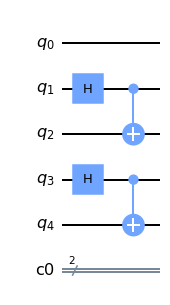

In [5]:
qr_circuit = QuantumRegister(5, 'q')
cr_circuit = ClassicalRegister(2, 'c0')

initial_epr = QuantumCircuit(qr_circuit, cr_circuit)

#Hadmard gate on 
initial_epr.h(1)
# #cnot gate on 0 and 1
initial_epr.cx(1, 2)
# #Hadmard gate on 
initial_epr.h(3)
# #cnot gate on 0 and 1
initial_epr.cx(3, 4)
#draw the circuit
# initial_epr.h(0)
# initial_epr.cx(0, 3)
initial_epr.draw('mpl')

In [6]:
bell_state_measurement = QuantumCircuit(qr_circuit, cr_circuit)

#CNOT gate on 1 and 2
bell_state_measurement.cx(2, 3)
#Hadamard on 1
bell_state_measurement.h(2)
#barrier to seperate measurement
bell_state_measurement.barrier((2, 3))
#add z measurement
# bell_state_measurement.measure((2 , 3), (0, 1))
# bell_state_measurement.x(4).c_if(3, 1)
# bell_state_measurement.z(4).c_if(2, 1)
# bell_state_measurement.cx(3, 4)
# bell_state_measurement.cz(2, 4)
#add barrier so BSM happens before CHSH
bell_state_measurement.barrier(range(5))
#bell_state_measurement.draw('mpl')

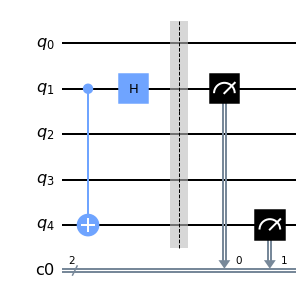

In [7]:
bell_state_measurement_AC = QuantumCircuit(qr_circuit, cr_circuit)

#CNOT gate on 1 and 2
bell_state_measurement_AC.cx(1, 4)
#Hadamard on 1
bell_state_measurement_AC.h(1)
#barrier to seperate measurement
bell_state_measurement_AC.barrier(range(5))
#add z measurement
bell_state_measurement_AC.measure((1 , 4), (0, 1))
bell_state_measurement_AC.draw('mpl')

In [8]:
circuit = initial_epr + bell_state_measurement
# circuit.reset((2,3))

C:\Users\ahoyt\AppData\Local\Temp\ipykernel_3304\859886492.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = initial_epr + bell_state_measurement


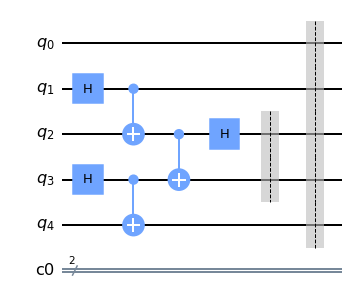

In [9]:
circuit.draw('mpl')

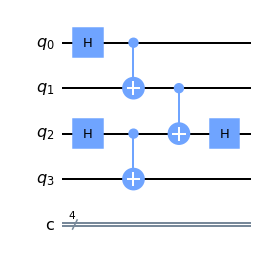

In [10]:
bell = QuantumCircuit(4,4)
bell.h((0, 2))
bell.cx((0, 2),(1, 3))
bell.cx(1, 2)
bell.h(2)
bell.draw('mpl')

In [11]:
job = aer_state.run(bell)
psi_bell = job.result().get_statevector(bell)
print(psi_bell)

Statevector([ 0.35355339+0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.35355339-4.32978028e-17j,
              0.35355339+0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.35355339+4.32978028e-17j,
              0.35355339-4.32978028e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.35355339+0.00000000e+00j,
             -0.35355339+4.32978028e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.35355339+0.00000000e+00j],
            dims=(2, 2, 2, 2))


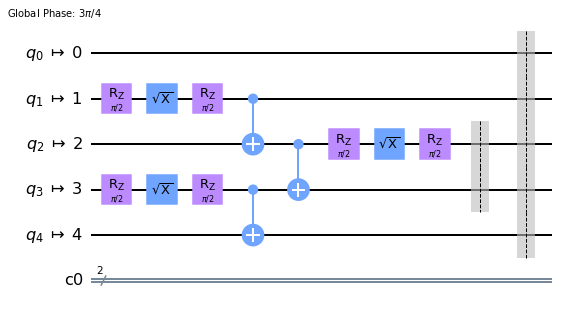

In [12]:
transpile(circuit, manila_real).draw('mpl')

In [13]:
#generate the calibration circuits
# meas_calibs, state_labels = .complete_meas_cal(qubit_list=[1,4])

# job_cal = aer_sim.run(transpile(circuit, manila_real), shots=15000)

# meas_fitter = CompleteMeasFitter(job_cal.result(),state_labels)

# tomo_bell = StateTomography(transpile(circuit, manila_real), measurement_qubits=[1, 4])
# tomo_bell.analysis.set_options(fitter='linear_inversion')
# tomo_bell.analysis.set_options(target=psi_bell)
#no correction


#correct data
# correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
# tomo_bell = StateTomographyFitter(correct_tomo_results, qst_bell)
# rho_bell = tomo_bell.fit()
# F_bell = state_fidelity(psi_bell, rho_bell)

In [14]:
# rho_bell = tomo_bell.run(backend=manila_real)

In [15]:
# tomo_bell.run_options

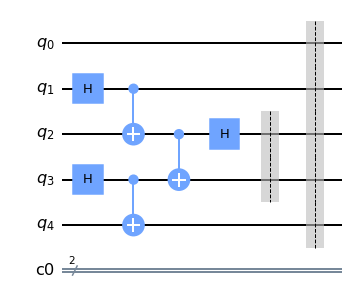

In [16]:
circuit.draw('mpl')

In [17]:
# print(rho_bell.analysis_results("state"))

In [18]:
# rho_bell_density = rho_bell.analysis_results("state").value

In [19]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
import qiskit.quantum_info as qi
import time
import copy

C:\Users\ahoyt\AppData\Local\Temp\ipykernel_3304\700340384.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


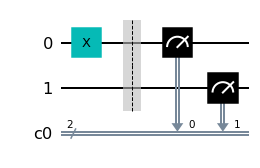

In [20]:
clr = ClassicalRegister(2, 'c0')
meas_calibs, state_labels = complete_meas_cal(qr=[qr_circuit[1], qr_circuit[4]], circlabel='mcal', cr = clr)
meas_calibs[1].draw('mpl')

In [21]:
# Generate circuits and run on simulator
t = time.time()
qst_bell5 = state_tomography_circuits(circuit, [qr_circuit[1], qr_circuit[4]])
lengthtomagraphy = len(qst_bell5)
total_circuits = []
for i in qst_bell5:
    total_circuits.append(i)
for i in meas_calibs:
    total_circuits.append(i)

job = execute(transpile(total_circuits, manila_real), manila_real, shots=20000)
tomographyjob = copy.deepcopy(job.result())
tomographyjob.results = tomographyjob.results[0: lengthtomagraphy]
meascalibjob = copy.deepcopy(job.result())
meascalibjob.results = meascalibjob.results[lengthtomagraphy: -1]
# Extract tomography data so that counts are indexed by measurement configuration
tomo_bell5 = StateTomographyFitter(tomographyjob, qst_bell5)
print('Time taken:', time.time() - t)
meas_fitter = CompleteMeasFitter(meascalibjob, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

Time taken: 3643.5832538604736


<IPython.core.display.Latex object>

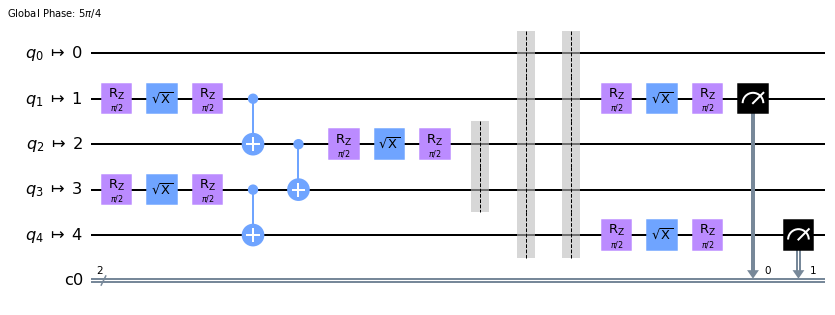

In [22]:
transpile(qst_bell5, manila_real)[0].draw('mpl')

In [23]:
print(job.result().get_counts())

[{'00': 5031, '01': 5152, '10': 4710, '11': 5107}, {'00': 4993, '01': 5304, '10': 4694, '11': 5009}, {'00': 4988, '01': 5106, '10': 4769, '11': 5137}, {'00': 5275, '01': 4883, '10': 5097, '11': 4745}, {'00': 5264, '01': 4959, '10': 5075, '11': 4702}, {'00': 5382, '01': 4950, '10': 4933, '11': 4735}, {'00': 5090, '01': 5081, '10': 4849, '11': 4980}, {'00': 5059, '01': 5278, '10': 4784, '11': 4879}, {'00': 4952, '01': 5046, '10': 5030, '11': 4972}, {'00': 19280, '01': 169, '10': 547, '11': 4}, {'00': 978, '01': 18635, '10': 20, '11': 367}, {'00': 513, '01': 7, '10': 19302, '11': 178}, {'00': 31, '01': 585, '10': 912, '11': 18472}]


In [24]:
#Error Mitigation
#Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(tomographyjob)
tomo_bell5_mitigated = StateTomographyFitter(mitigated_results, qst_bell5)

In [25]:
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_state_city
t = time.time()
rho_fit_bell5 = tomo_bell5.fit(method='lstsq')
rho_fit_bell5_mitigated = tomo_bell5_mitigated.fit(method='lstsq')
print('Time taken:', time.time() - t)
print('State fidelity: F = {:.5f}'.format(qi.state_fidelity(rho_fit_bell5, partial_trace(DensityMatrix(bell),[1,2]))))
print('State fidelity Mitigated: F = {:.5f}'.format(qi.state_fidelity(rho_fit_bell5_mitigated, partial_trace(DensityMatrix(bell),[1,2]))))

Time taken: 0.01913166046142578
State fidelity: F = 0.99902
State fidelity Mitigated: F = 0.99301


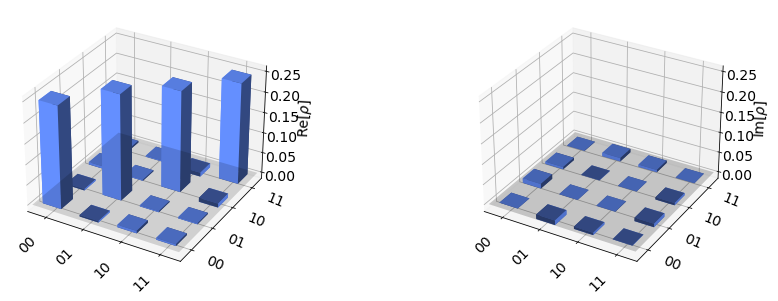

In [26]:
plot_state_city(rho_fit_bell5)

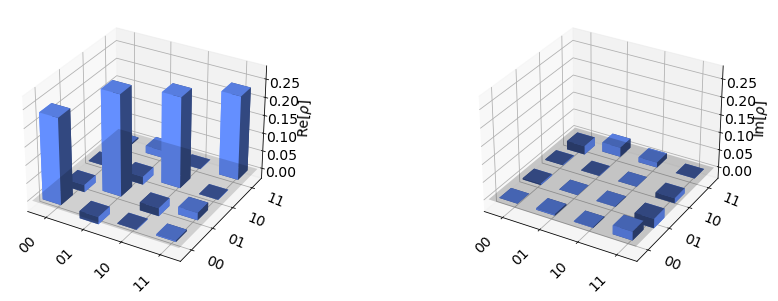

In [27]:
plot_state_city(rho_fit_bell5_mitigated)

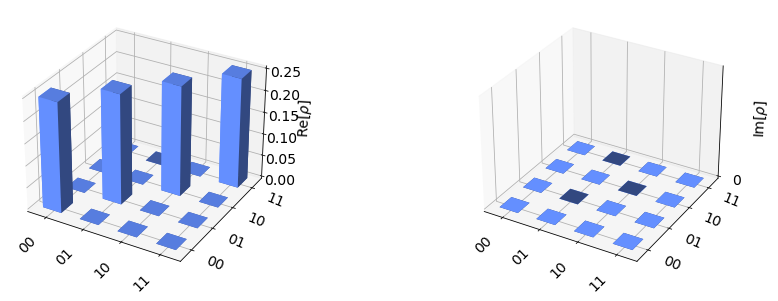

In [28]:
plot_state_city(partial_trace(DensityMatrix(bell),[1,2]))

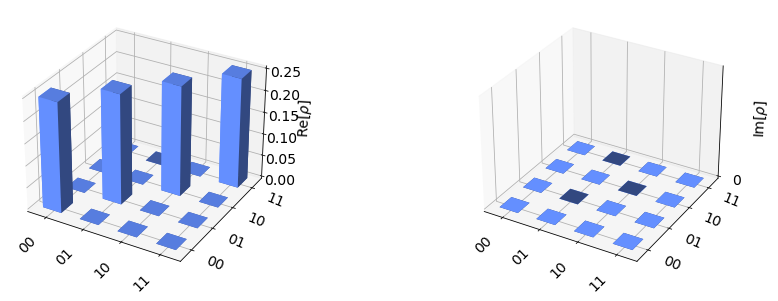

In [29]:
DM = DensityMatrix.from_instruction(circuit)
DM.measure((2, 3))
PT=partial_trace(DM,[0,2,3])
plot_state_city(PT)

In [30]:
# tomo_bell.run_options

In [31]:
from qiskit.visualization import plot_state_city
# plot_state_city(psi_bell)

In [32]:
# plot_state_city(rho_bell_density)

In [33]:
# type(rho_bell_density)

In [34]:
# F_bell = state_fidelity(psi_bell, rho_bell_density)
# print('Fit Fidelity (no correction) =', F_bell)

In [35]:
rho_bell = tomo_bell.run(backend=aer_sim)

NameError: name 'tomo_bell' is not defined

In [ ]:
rho_bell_density = rho_bell.analysis_results("state").value

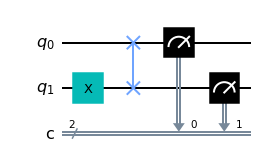

In [23]:
swap_circuit = QuantumCircuit(2, 2)
swap_circuit.x(1)
swap_circuit.swap(0, 1)
swap_circuit.measure((0, 1), (0, 1))
swap_circuit.draw('mpl')

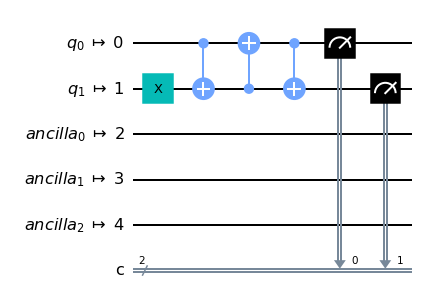

In [25]:
aer_sim_job = aer_sim.run(transpile(swap_circuit, manila_sim), shots=10000)
aer_sim_job.result().get_counts()
transpile(swap_circuit, manila_sim).draw('mpl')

In [ ]:
tomo_bell.analysis_options

In [ ]:
rho_bell.analysis_results()

In [ ]:
from qiskit.quantum_info import Statevector, DensityMatrix
plot_state_city(DensityMatrix(bell))

In [ ]:
plot_state_city(rho_bell_density)

In [ ]:
F_bell = state_fidelity(psi_bell, rho_bell_density)
print('Fit Fidelity (no correction) =', F_bell)

In [6]:
circuit.cx(1, 4)
circuit.h(1)
circuit.measure(1, 1)
circuit.measure(4, 4)
circuit.draw('mpl')


NameError: name 'circuit' is not defined

In [ ]:
qr = QuantumRegister(5)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')
cal_results = manila_sim.run(transpile(meas_calibs, manila_real), shots=10000).result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

In [ ]:
results = manila_sim.run(transpile(circuit, manila_real), shots=10000).result()

#Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(results)
mitigated_counts = mitigated_results.get_counts()
noisy_counts = results.get_counts()

In [ ]:
transpile(circuit, manila_real).draw('mpl')

In [ ]:
manila_sim_job = manila_sim.run(transpile(circuit, manila_real), shots=10000)
aer_sim_job = aer_sim.run(transpile(circuit, manila_real), shots=10000)

In [ ]:
# Grab the results from the job.
aer_sim_result = aer_sim_job.result().get_counts()
manila_sim_result = manila_sim_job.result().get_counts()

In [ ]:
def prob_epr_pairs(circuit_counts):
    no_shots = sum(circuit_counts[outcome] for outcome in circuit_counts)
    
    zz = 0
    zo = 0
    oz = 0
    oo = 0
    
    for element in circuit_counts:
        if int(element[0]) == 0 and int(element[3]) == 0:
            zz += circuit_counts[element]
            
        if int(element[0]) == 0 and int(element[3]) == 1:
            zo += circuit_counts[element]
            
        if int(element[0]) == 1 and int(element[3]) == 0:
            oz += circuit_counts[element]
            
        if int(element[0]) == 1 and int(element[3]) == 1:
            oo += circuit_counts[element]
            
    return np.array([zz, zo, oz, oo]) / no_shots

In [ ]:
print("Mixed State probabilities")
prob = prob_epr_pairs(manila_sim_result)
print(f"zz: {prob[0]}")
print(f"zo: {prob[1]}")
print(f"oz: {prob[2]}")
print(f"oo: {prob[3]}")

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(manila_sim_result)

In [ ]:
print("Mixed State probabilities")
prob = prob_epr_pairs(noisy_counts)
print(f"zz: {prob[0]}")
print(f"zo: {prob[1]}")
print(f"oz: {prob[2]}")
print(f"oo: {prob[3]}")

In [ ]:
print("Mixed State probabilities")
prob = prob_epr_pairs(mitigated_counts)
print(f"zz: {prob[0]}")
print(f"zo: {prob[1]}")
print(f"oz: {prob[2]}")
print(f"oo: {prob[3]}")